In [5]:
import importlib
import matplotlib.pyplot as plt
import numpy
import os
cvx_path = os.path.abspath(os.path.join('..', '..', 'cvxEDA', 'src'))
module_path = os.path.abspath(os.path.join('..', '..', 'src'))
import sys
sys.path.append(module_path)

import tools.data_reader_apd as dr_a
import tools.data_reader_case as dr_c
import tools.data_reader_wesad as dr_w

import tools.display_tools as dt
import tools.preprocessing as preprocessing

import train

## APD

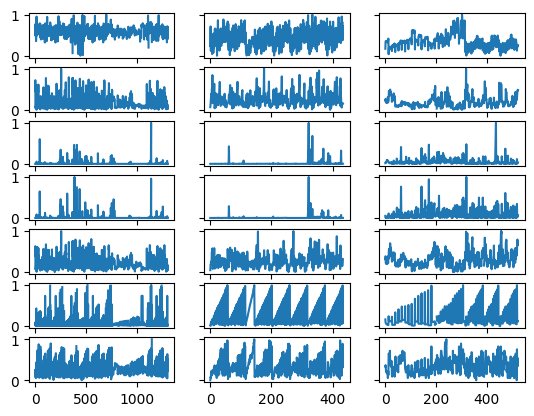

<Figure size 1000x600 with 0 Axes>

In [13]:
importlib.reload(dt)
importlib.reload(train)
importlib.reload(preprocessing)
importlib.reload(dr_a)
importlib.reload(dr_c)
importlib.reload(dr_w)

anxiety_label_type = None
case_label_type = dr_c.SelfReports.AROUSAL
wesad_label_type = "stai"

threshold = "fixed"

metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    train.Metrics.HF_RR, 
    train.Metrics.LF_RR, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE
]
# ] + train.Metrics.STATISTICAL

model_phases_apd = [
    "Baseline_Rest", 
    "BugBox_Relax", "BugBox_Anticipate", "BugBox_Exposure", "BugBox_Break",
    "Speech_Relax", "Speech_Anticipate", "Speech_Exposure", "Speech_Break"
]
model_phases_wesad = dr_w.Phases.PHASE_ORDER


x_a, y_a = train.Train_APD.get_apd_data_ranking(metrics, model_phases_apd, verbose=False, anxiety_label_type=anxiety_label_type, threshold=threshold, normalize=True)
x_c, y_c = train.Train_CASE.get_case_data(metrics, verbose=False, label_type=case_label_type, threshold=threshold, normalize=True)
x_w, y_w = train.Train_WESAD.get_wesad_data(metrics, model_phases_wesad, verbose=False, label_type=wesad_label_type, threshold=threshold, normalize=True)

data = [x_a, x_c, x_w]

fig, axs  = plt.subplots(len(metrics), 3, sharey="row")
plt.figure(figsize=(10, 6))
for row, metric in enumerate(metrics):
    for col in range(3):
        axs[row][col].plot(data[col].loc[:, metric])